# Deep_Learning_from_Scratch_2 - part3

#### 딥러닝의 기본적인 내용을 정리하였습니다. 밑바닥부터 시작하는 딥러닝2(사이토 고키 지음)을 참고하였습니다. 

## 4. Word2vec 속도 개선
#### - Embedding 도입 / 네거티스 샘플링 도입

### 4.1 word2vec 개선 1
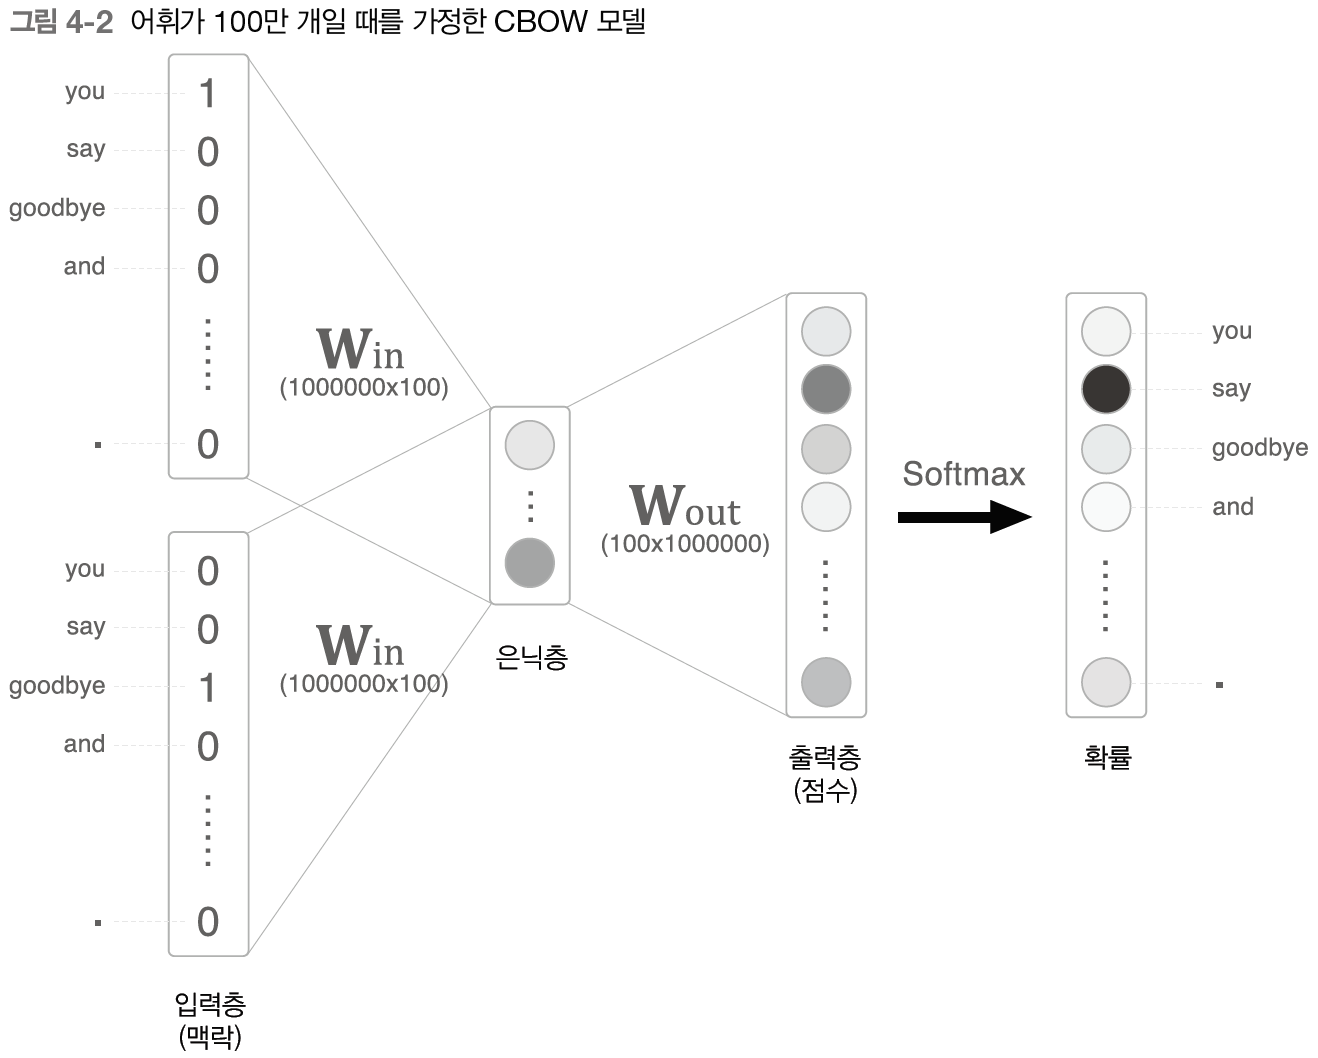
#### - 입력층의 원핫 표현과 가중치 행렬 W_in의 곱 계산 - embedding 층으로 해결 / 은닉층과 가중치 행렬 W_out의 곱 및 softmax 계층 계산 - 네거티브 샘플링으로 해결

#### 4.1.1 Embedding 계층
#### - Embedding 계층 : 단어 id에 해당하는 행(벡터)를 추출하는 계층
#### 4.1.2 Embedding 계층 구현

In [2]:
import numpy as np
W = np.arange(21).reshape(7,3)
print(W)
print(W[2])
print(W[5])

idx = np.array([1,0,3,0])
print(W[idx])

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]
 [15 16 17]
 [18 19 20]]
[6 7 8]
[15 16 17]
[[ 3  4  5]
 [ 0  1  2]
 [ 9 10 11]
 [ 0  1  2]]


In [4]:
class Embedding:
    def __init__(self, W):
        self.params = [W]
        self.grads = [np.zeros_like(W)]
        self.idx = None
        
    def forward(self, idx):
        W, = self.params
        self.idx = idx
        out = W[idx]
        return out
    
    def backward(self, dout):
        dW, = self.grads
        dW[...] = 0
        
        for i, word_id in enumerate(self.idx):
            dW[word_id] += dout[i]
        
        return None

### 4.2 Word2vec 개선 2
#### 4.2.1 은닉층 이후 계산의 문제점
#### - 은닉층의 뉴런과 가중치 행렬의 곱에서 메모리 사용량이 너무 키짐 / Softmax 연산의 비용이 큼
#### 4.2.2 다중 분류에서 이진 분류로
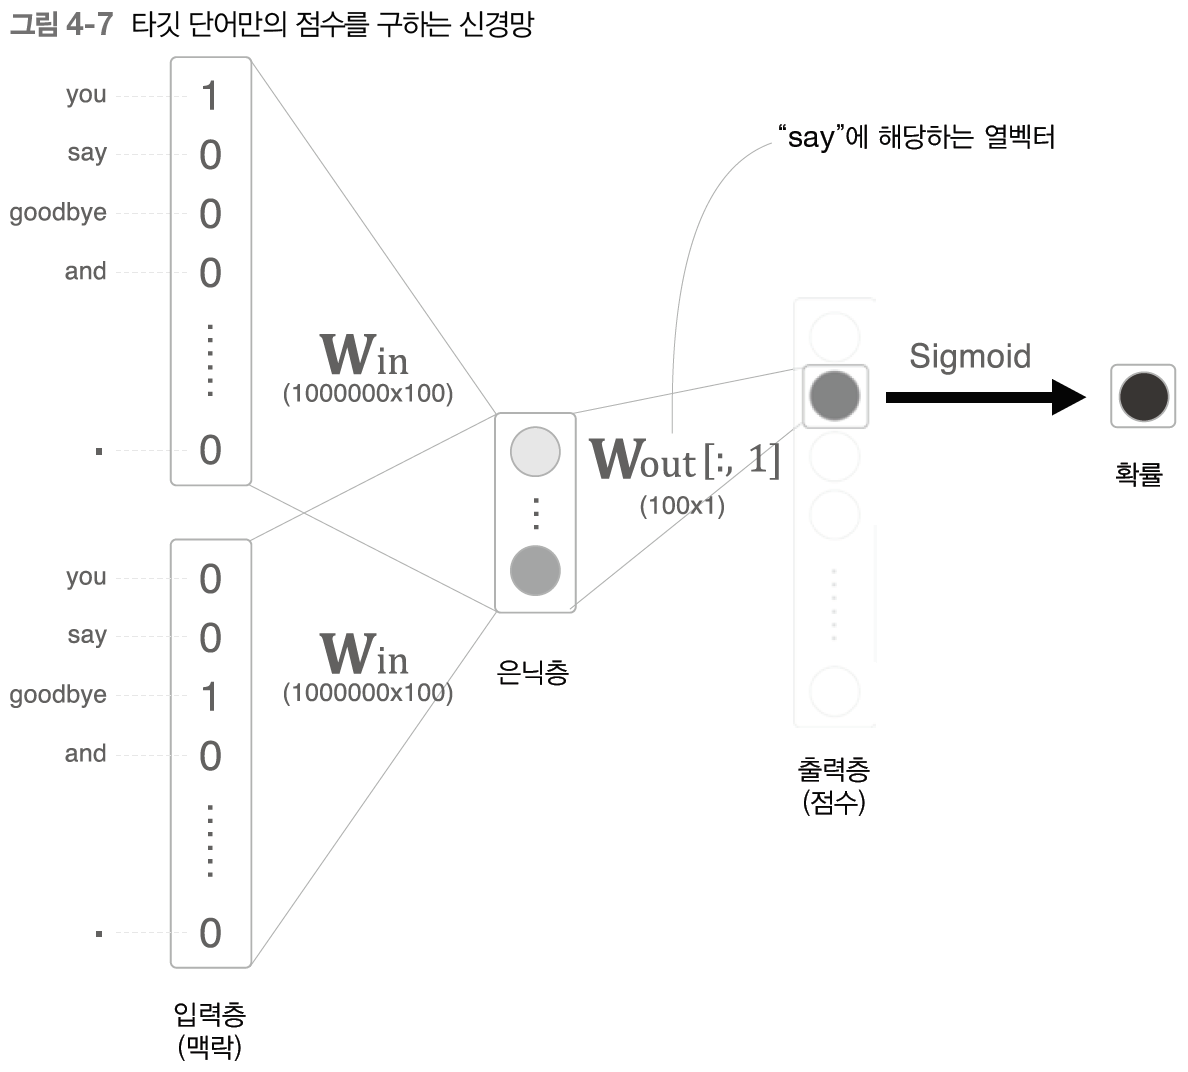
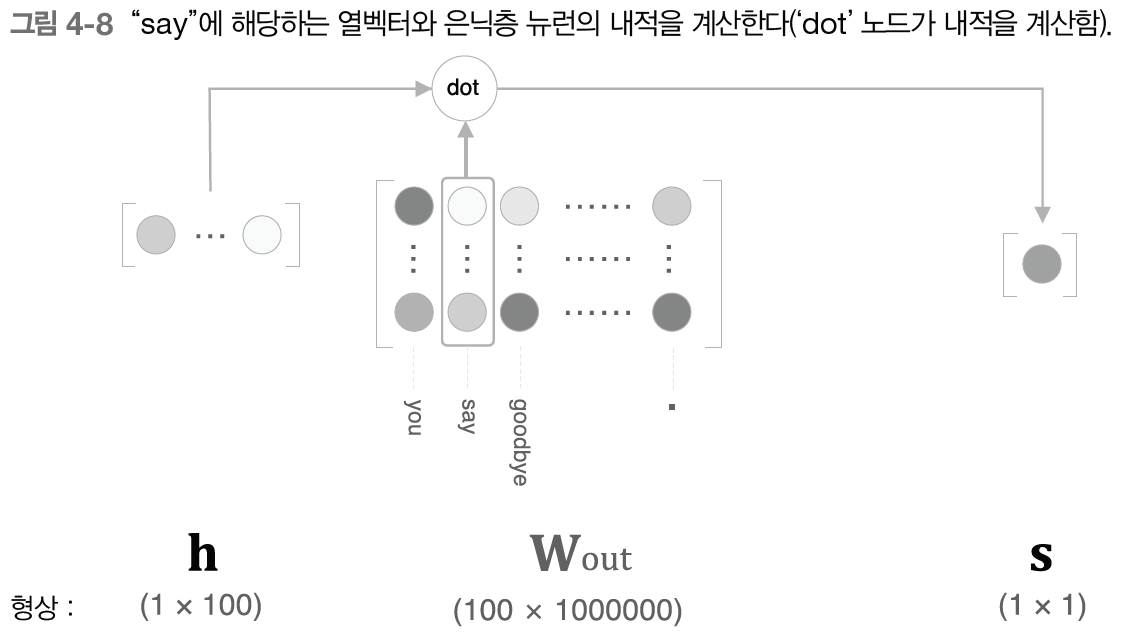
#### 4.2.3 시그모이드 함수와 교차 엔트로피 오차 
#### - 이진 분류 문제를 신경망으로 풀기 위해서는 점수에 시그모이드 함수를 적용해 확률로 변환하고, 손실함수로 교차 엔트로피 오차를 사용
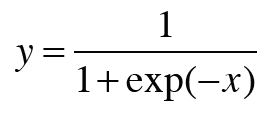
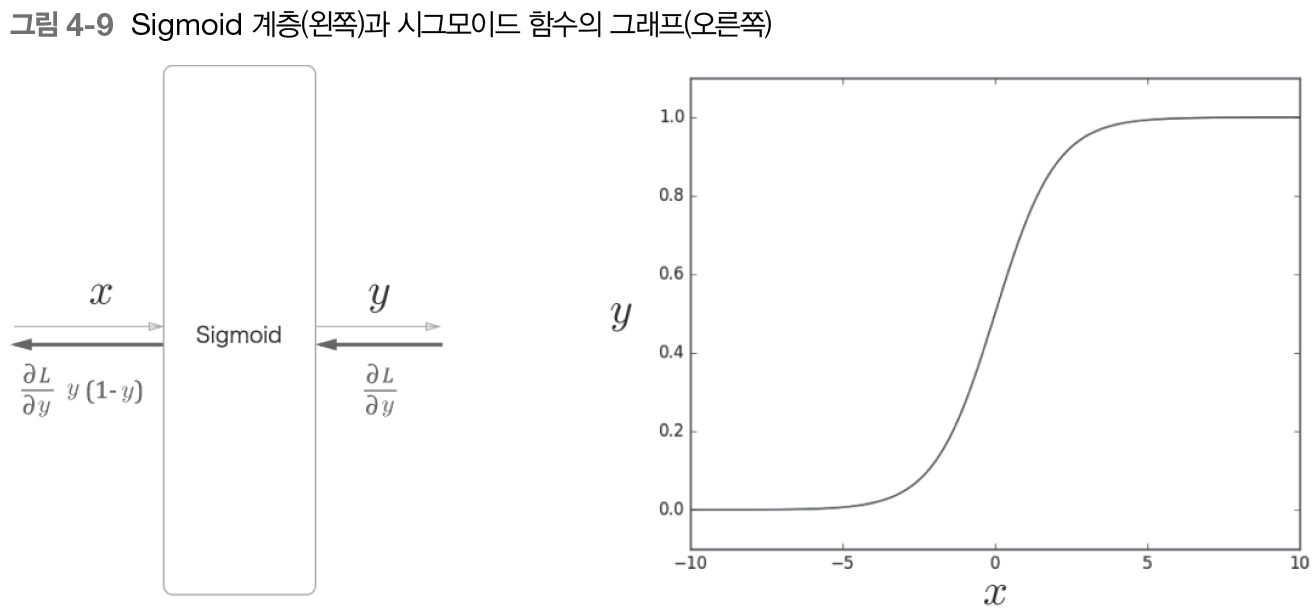
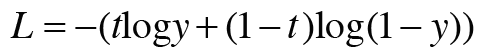
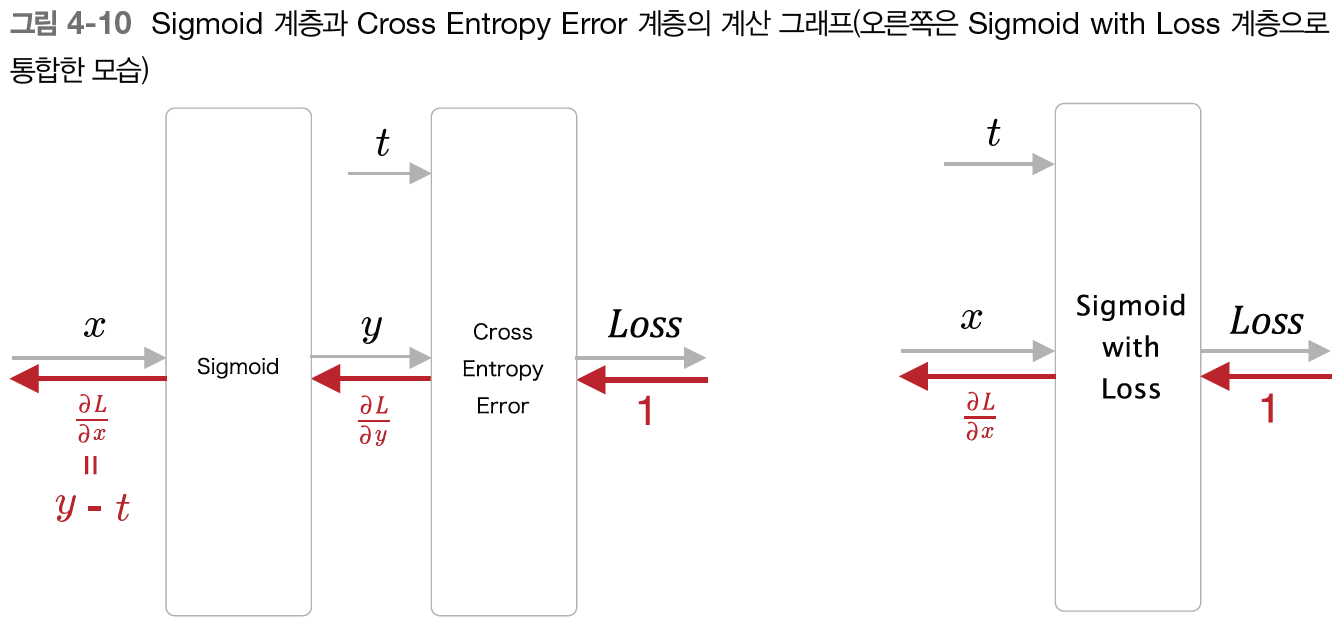
#### - 역전파의 y-t : 오차가 크면 크게 학습하고 오차가 작으면 작게 학습
#### 4.2.4 다중 분류에서 이진 분류로 (구현)
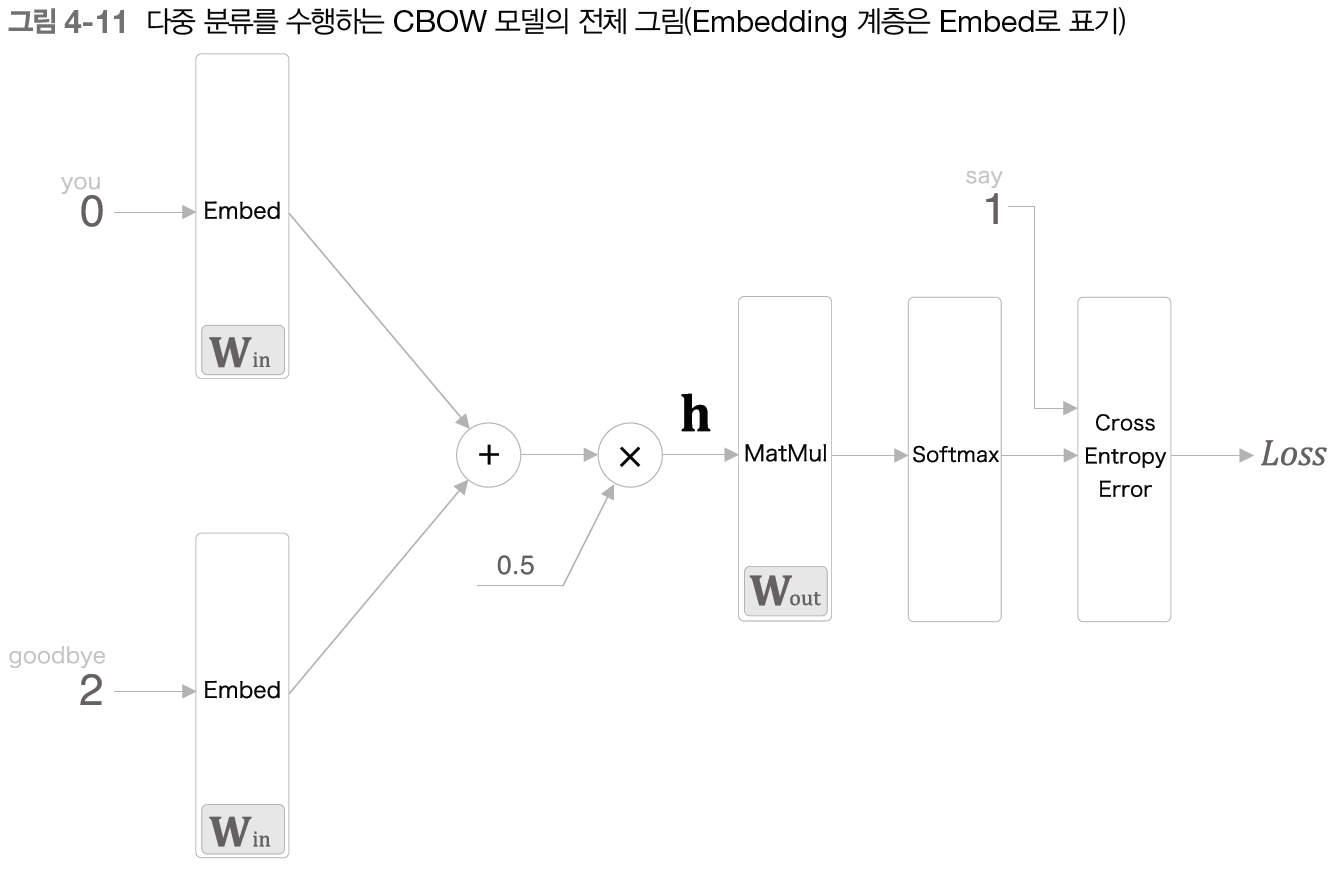
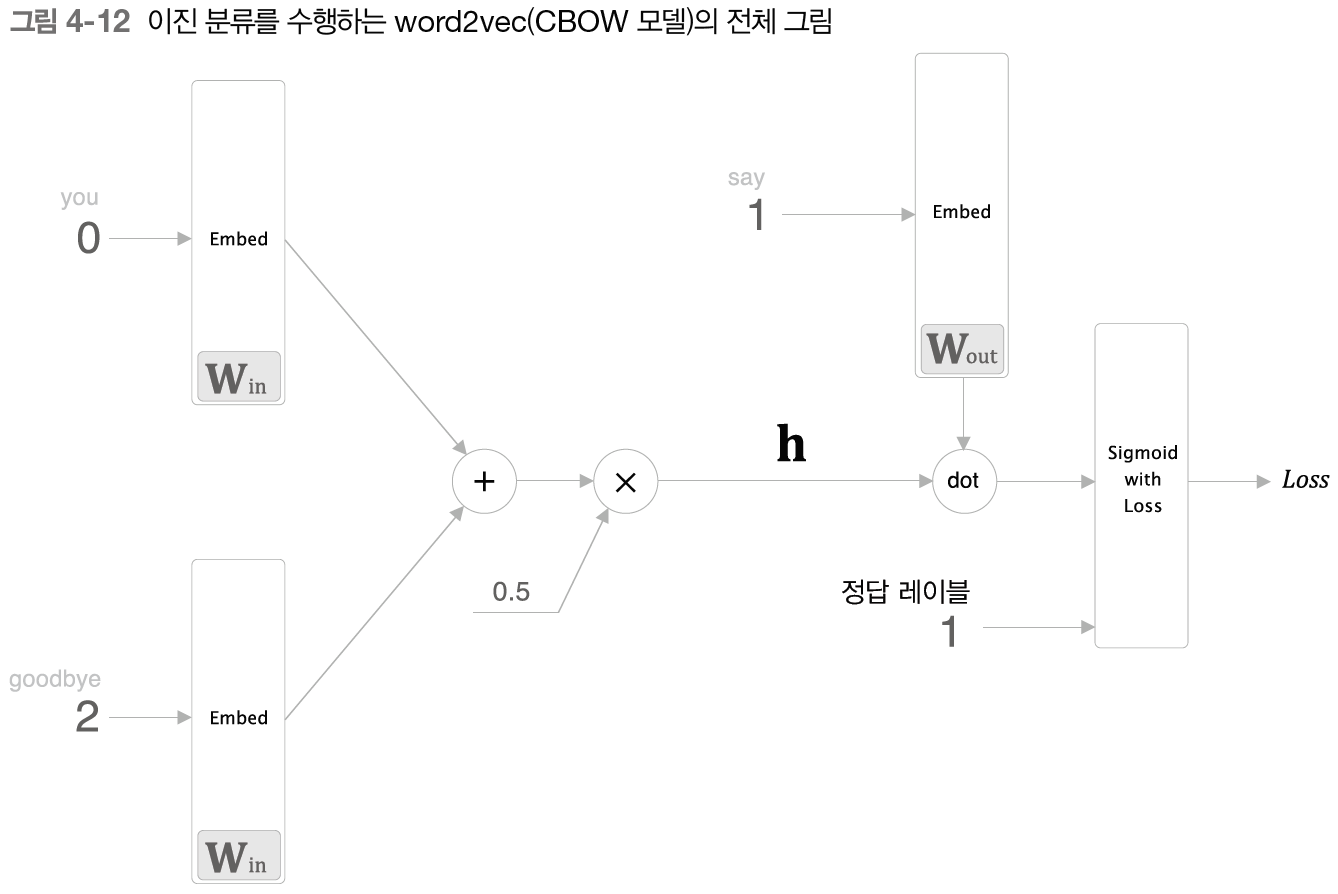
#### - Embedding Dot : Embedding 계층 + dot 연산(내적)

In [6]:
class EmbeddingDot:
    def __init__(self, W):
        self.embed = Embedding(W)
        self.params = self.embed.params
        self.grads = self.embed.grads
        self.cache = None
    
    def forward(self, h, idx):
        target_W = self.embed.forward(idx)
        out = np.sum(target_W * h, axis=1)
        self.cache = (h, target_W)
        
        return out
    
    def backward(self, dout):
        h, target_W = self.cache
        dout = dout.reshape(dout.shape[0], 1)
        dtarget_W = dout*h
        self.embed.backward(dtarget_W)
        dh = dout*target_W
        return dh

#### 4.2.5 네거티브 샘플링
#### - 부정적인 답변의 적은 수를 샘플링하여 사용
#### - 긍정적인 답변에는 출력을 1에 가깝게 부정적인 답변에는 출력을 0에 가깝게
#### - 최종손실 : 긍정적 답변에 대한 손실 + 샘플링된 부정적 답변의 모든 손실 합
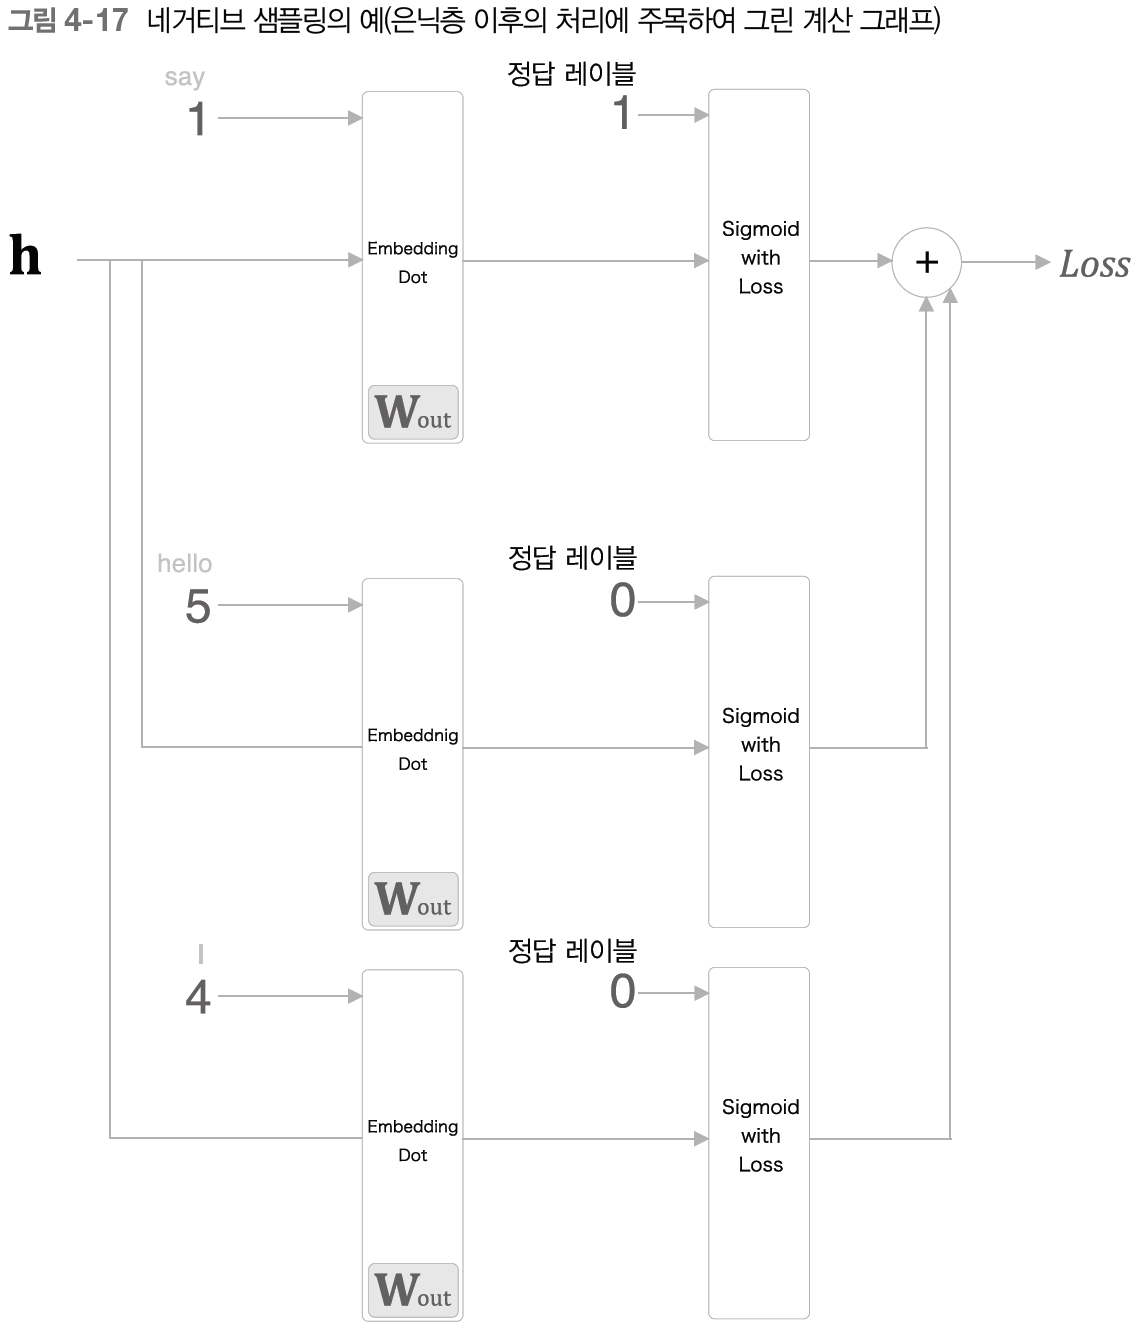

#### 4.2.6 네거티브 샘플링의 샘플링 기법
#### - 부정적인 답변 샘플링 방법 : 말뭉치의 통계 데이터를 기초로 샘플링 - 자주 등장하는 단어를 많이 추출하고, 드물게 등장하는 단어를 적게 추출
#### - 말뭉치에서의 단어별 출현 횟수를 바탕으로 확률분포를 구한 다음, 그 확률분포에 따라서 샘플링 수행
#### - 출현 확률이 낮은 단어를 버리지 않기 위하여 원래 확률분포의 각 요서에 0.75 제곱을 해준다.
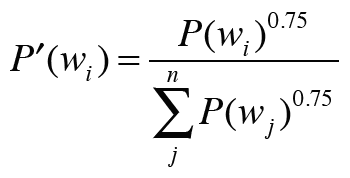


In [8]:
import numpy as np
print(np.random.choice(10))
print(np.random.choice(10))
words = ['you', 'say', 'goodbye', 'I', 'hello', '.']
print(np.random.choice(words))

print(np.random.choice(words, size =5))

#### 중복 방지
print(np.random.choice(words, size=5, replace=False))

p = [0.5, 0.1, 0.05, 0.2, 0.05, 0.1]

#### 주어진 확률분포에 따라 sampling
print(np.random.choice(words, p=p))

9
6
goodbye
['you' 'say' 'say' 'you' 'hello']
['you' 'hello' 'say' '.' 'goodbye']
you


#### 4.2.7 네거티브 샘플링 구현

### 4.3 개선판 word2vec 학습
#### 4.3.1 CBOW 모델 구현
#### 4.3.2 CBOW 모델 학습 코드
#### 4.3.3 CBOW 모델 평가
#### - word2vec으로 얻은 단어의 분산 표현은 비슷한 단어를 가까이 모을 뿐만 아니라, 더 복잡한 패턴을 파악
#### - word2vec의 단어의 분산 표현을 사용하면 유추 문제를 벡터의 덧셈과 뺄셈으로 풀 수 있음

### 4.4 word2vec 남은 주제
#### 4.4.1 word2vec을 사용한 애플리케이션의 예
#### - 전이 학습 : 한 분야에서 배운 지식을 다른 분야에도 적용하는 기법
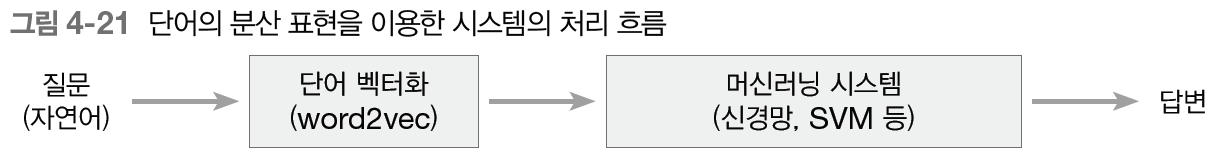
#### 4.4.2 단어 벡터 평가 방법
#### - 유사성 / 유추 문제